In [ ]:
import os
import random
import shutil

base_dir = "dataset"

cat_dir = os.path.join(base_dir, "Cat")
dog_dir = os.path.join(base_dir, "Dog")

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for folder in ["cats", "dogs"]:
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, folder), exist_ok=True)

def split_images(source, train_dest, test_dest, split_ratio=0.8):
    images = os.listdir(source)
    images = [img for img in images if img.endswith(".jpg")]
    random.shuffle(images)

    split = int(len(images) * split_ratio)
    train_images = images[:split]
    test_images = images[split:]

    for img in train_images:
        shutil.copy(os.path.join(source, img), train_dest)

    for img in test_images:
        shutil.copy(os.path.join(source, img), test_dest)

split_images(cat_dir,
             os.path.join(train_dir, "cats"),
             os.path.join(test_dir, "cats"))

split_images(dog_dir,
             os.path.join(train_dir, "dogs"),
             os.path.join(test_dir, "dogs"))

print("✅ Train–Test split completed successfully")


In [5]:
print("Train cats:", len(os.listdir("dataset/train/cats")))
print("Train dogs:", len(os.listdir("dataset/train/dogs")))
print("Test cats:", len(os.listdir("dataset/test/cats")))
print("Test dogs:", len(os.listdir("dataset/test/dogs")))


Train cats: 12490
Train dogs: 12469
Test cats: 11402
Test dogs: 11111


Found 24959 images belonging to 2 classes.
Found 22513 images belonging to 2 classes.


C:\Users\saiav\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
467/780 ━━━━━━━━━━━━━━━━━━━━ 3:14 621ms/step - accuracy: 0.5807 - loss: 0.8224

C:\Users\saiav\AppData\Roaming\Python\Python313\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


780/780 ━━━━━━━━━━━━━━━━━━━━ 778s 994ms/step - accuracy: 0.6824 - loss: 0.6009 - val_accuracy: 0.7757 - val_loss: 0.4707
Epoch 2/5
780/780 ━━━━━━━━━━━━━━━━━━━━ 874s 1s/step - accuracy: 0.7919 - loss: 0.4488 - val_accuracy: 0.8418 - val_loss: 0.3680
Epoch 3/5
780/780 ━━━━━━━━━━━━━━━━━━━━ 577s 740ms/step - accuracy: 0.8450 - loss: 0.3493 - val_accuracy: 0.9080 - val_loss: 0.2592
Epoch 4/5
780/780 ━━━━━━━━━━━━━━━━━━━━ 572s 676ms/step - accuracy: 0.9129 - loss: 0.2160 - val_accuracy: 0.9606 - val_loss: 0.1256
Epoch 5/5
780/780 ━━━━━━━━━━━━━━━━━━━━ 530s 680ms/step - accuracy: 0.9599 - loss: 0.1050 - val_accuracy: 0.9876 - val_loss: 0.0465


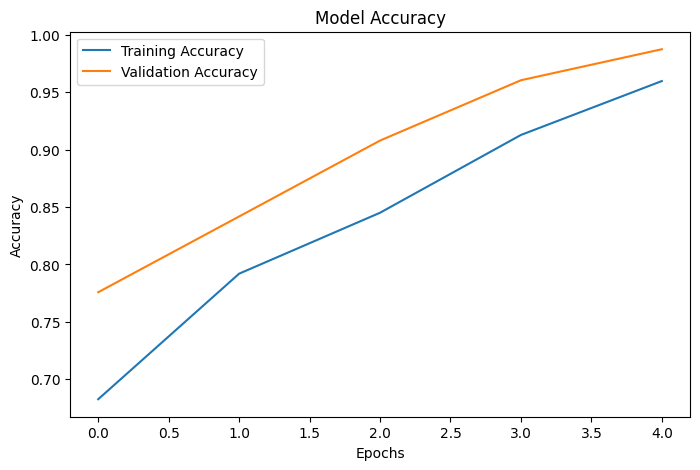

In [2]:
# ================================
# 1. Import Required Libraries
# ================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# ================================
# 2. Image Data Preprocessing
# ================================
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory="dataset/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    directory="dataset/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)


# ================================
# 3. Build CNN Model
# ================================
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# ================================
# 4. Compile the Model
# ================================
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# ================================
# 5. Train the Model
# ================================
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


# ================================
# 6. Plot Accuracy Graph
# ================================
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)

    if prediction[0][0] > 0.5:
        print("🐶 Dog")
    else:
        print("🐱 Cat")


In [11]:
predict_image("dataset/sample/tiger1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
🐶 Dog


In [31]:
model.save("cat_dog_model.keras")


In [34]:
from tensorflow.keras.models import load_model

model = load_model("cat_dog_model.keras")

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0][0]

    if pred > 0.7:
        print(f"🐶 Dog ({pred*100:.2f}%)")
    elif pred < 0.3:
        print(f"🐱 Cat ({(1-pred)*100:.2f}%)")
    else:
        print("⚠️ Unknown / Low confidence")


In [38]:
predict_image("dataset/sample/cat1.jpg")
predict_image("dataset/sample/dog1.jpeg")
predict_image("dataset/sample/tiger1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
🐱 Cat (79.33%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
🐶 Dog (99.86%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
🐶 Dog (99.99%)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)